In [2]:
from scripts.db_connection import get_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import psycopg2

In [ ]:
'''
atm_pressure_station_level
date_time_utc
dew_point_temperature
dry_bulb_temperature
global_radiation
hourly_relative_humidity
hourly_wind_direction
hourly_wind_speed
max_atm_pressure_last_hour
max_dew_point_temperature_last_hour
max_relative_humidity_last_hour
max_temperature_last_hour
max_wind_gust
min_atm_pressure_last_hour
min_dew_point_temperature_last_hour
min_relative_humidity_last_hour
min_temperature_last_hour
total_precipitation
station_id'''

'''
id
altitude
code
founding_date
latitude
longitude
name
region
uf'''

'''
tb_climate_track 
tb_station
'''

'''
areia: 1e3f1492-7521-4c6a-9d64-a232560816d8
patos: 1e3f1492-7521-4c6a-9d64-a232560816d8
cabaceiras: 888edcb8-54b8-4c35-ae6e-67a5a6bed35d 
'''

In [3]:
conn = get_connection()

TEMPERATURA moda e media areia

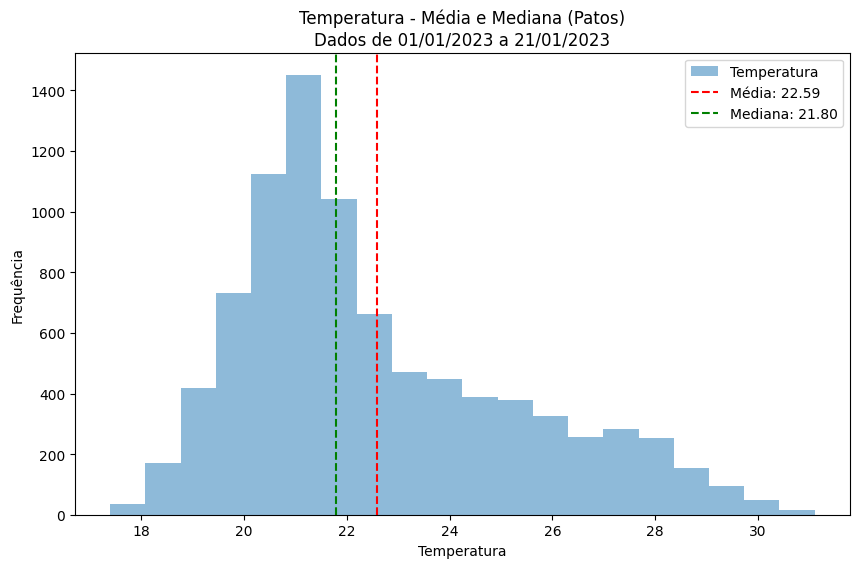

In [22]:
def plot_mean_median(station_id, station_name):
    query = f"""
    SELECT dry_bulb_temperature
    FROM tb_climate_track
    WHERE station_id = '{station_id}'
    LIMIT 500000;
    """
    df = pd.read_sql(query, conn)

    # Cálculo de média e mediana
    mean_temp = df['dry_bulb_temperature'].mean()
    median_temp = df['dry_bulb_temperature'].median()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(df['dry_bulb_temperature'], bins=20, alpha=0.5, label='Temperatura')
    plt.axvline(mean_temp, color='r', linestyle='--', label=f'Média: {mean_temp:.2f}')
    plt.axvline(median_temp, color='g', linestyle='--', label=f'Mediana: {median_temp:.2f}')
    plt.title(f'Temperatura - Média e Mediana ({station_name})\nDados de 01/01/2023 a 21/01/2023')
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()


plot_mean_median('1e3f1492-7521-4c6a-9d64-a232560816d8', 'Patos')


Moda da Radiação Global – Estação Cabaceiras

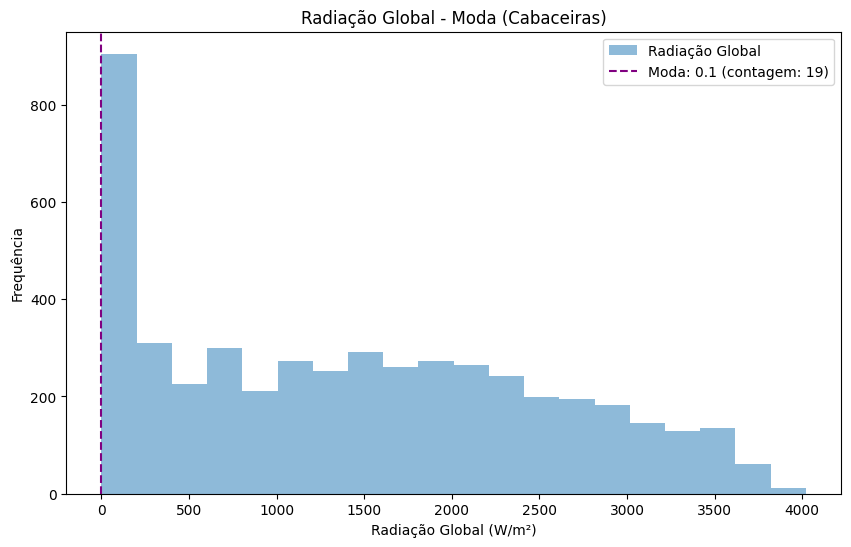

Moda da Radiação Global em Cabaceiras: 0.1, contagem: 19


In [13]:
def plot_mode_global_radiation(station_id, station_name):
    query = f"""
    SELECT global_radiation
    FROM tb_climate_track
    WHERE station_id = '{station_id}'
    LIMIT 5000000;
    """
    df = pd.read_sql(query, conn)

    # Cálculo da moda usando value_counts()
    mode_series = df['global_radiation'].value_counts()
    mode_value = mode_series.idxmax()  # Valor da moda
    mode_count = mode_series.max()      # Contagem da moda

    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(df['global_radiation'], bins=20, alpha=0.5, label='Radiação Global')
    plt.axvline(mode_value, color='purple', linestyle='--', label=f'Moda: {mode_value} (contagem: {mode_count})')
    plt.title(f'Radiação Global - Moda ({station_name})')
    plt.xlabel('Radiação Global (W/m²)')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

    print(f"Moda da Radiação Global em {station_name}: {mode_value}, contagem: {mode_count}")

# Chamando a função para a estação Cabaceiras
plot_mode_global_radiation('888edcb8-54b8-4c35-ae6e-67a5a6bed35d', 'Cabaceiras')


 Gráfico de Quartis para Radiação Global – Estação Cabaceiras

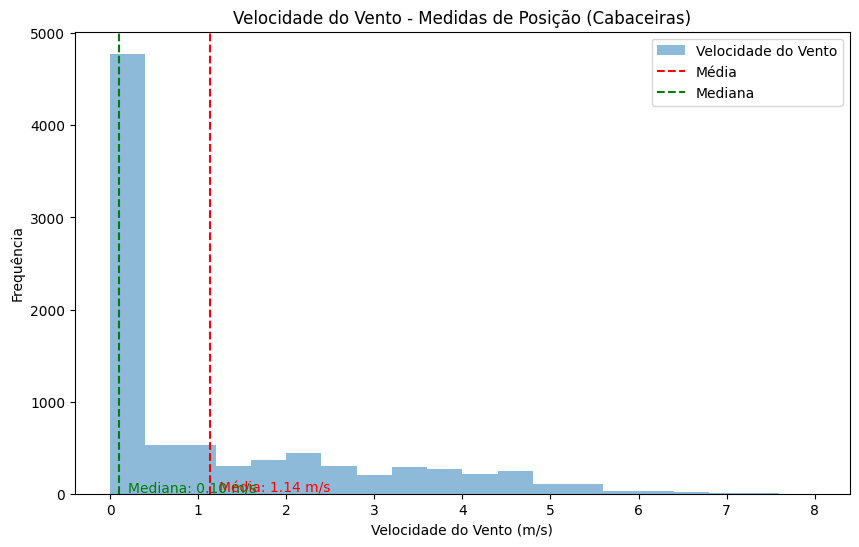

In [16]:
def plot_wind_speed_position_with_labels(station_id, station_name):
    query = f"""
    SELECT hourly_wind_speed
    FROM tb_climate_track
    WHERE station_id = '{station_id}'
    LIMIT 500000;
    """
    df = pd.read_sql(query, conn)

    # Cálculo da média e mediana como medidas de posição
    mean_wind_speed = df['hourly_wind_speed'].mean()
    median_wind_speed = df['hourly_wind_speed'].median()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(df['hourly_wind_speed'], bins=20, alpha=0.5, label='Velocidade do Vento')
    plt.axvline(mean_wind_speed, color='r', linestyle='--', label='Média')
    plt.axvline(median_wind_speed, color='g', linestyle='--', label='Mediana')

    # Adicionando texto para média e mediana no gráfico
    plt.text(mean_wind_speed + 0.1, 15, f'Média: {mean_wind_speed:.2f} m/s', color='red')
    plt.text(median_wind_speed + 0.1, 15, f'Mediana: {median_wind_speed:.2f} m/s', color='green')

    plt.title(f'Velocidade do Vento - Medidas de Posição ({station_name})')
    plt.xlabel('Velocidade do Vento (m/s)')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

# Chamando a função para a estação Cabaceiras
plot_wind_speed_position_with_labels('888edcb8-54b8-4c35-ae6e-67a5a6bed35d', 'Cabaceiras')


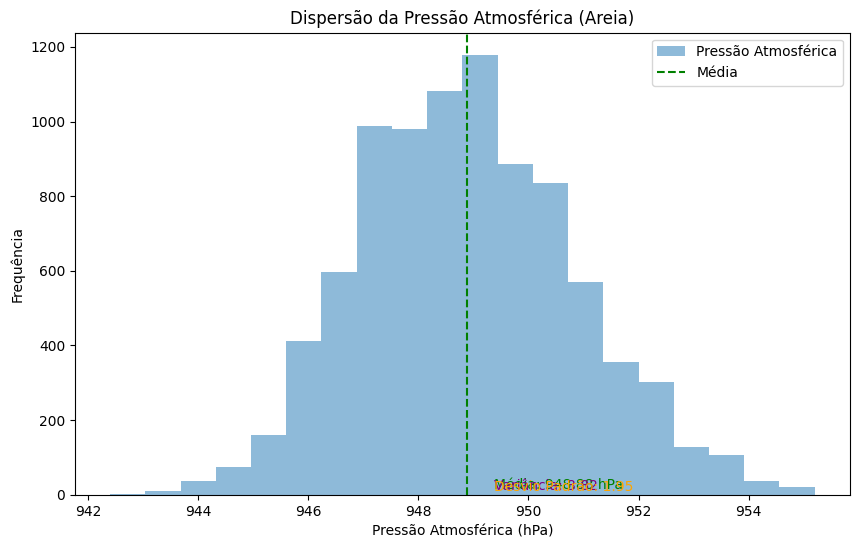

Variância da Pressão: 3.82
Desvio Padrão da Pressão: 1.95


In [21]:
def plot_dispersion_pressure_with_labels(station_id, station_name):
    query = f"""
    SELECT atm_pressure_station_level
    FROM tb_climate_track
    WHERE station_id = '{station_id}'
    LIMIT 50000;
    """
    df = pd.read_sql(query, conn)

    # Cálculo de variância e desvio padrão
    variance_pressure = df['atm_pressure_station_level'].var()
    std_dev_pressure = df['atm_pressure_station_level'].std()
    mean_pressure = df['atm_pressure_station_level'].mean()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(df['atm_pressure_station_level'], bins=20, alpha=0.5, label='Pressão Atmosférica')
    plt.axvline(mean_pressure, color='green', linestyle='--', label='Média')

    # Adicionando texto para variância e desvio padrão no gráfico
    plt.text(mean_pressure + 0.5, 15, f'Média: {mean_pressure:.2f} hPa', color='green')
    plt.text(mean_pressure + 0.5, 12, f'Variância: {variance_pressure:.2f}', color='purple')
    plt.text(mean_pressure + 0.5, 9, f'Desvio Padrão: {std_dev_pressure:.2f}', color='orange')

    plt.title(f'Dispersão da Pressão Atmosférica ({station_name})')
    plt.xlabel('Pressão Atmosférica (hPa)')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

    # Imprimindo as medidas no console
    print(f"Variância da Pressão: {variance_pressure:.2f}")
    print(f"Desvio Padrão da Pressão: {std_dev_pressure:.2f}")

# Chamando a função para a estação Areia
plot_dispersion_pressure_with_labels('1e3f1492-7521-4c6a-9d64-a232560816d8', 'Areia')
